In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**CREATING INDIVIDUAL DATAFRAMES**

In [2]:
amazon_df = pd.read_csv('amazon_reviews.csv')
twitter_df = pd.read_csv('Tweets.csv')
yelp_df = pd.read_csv('yelp.csv')

In [3]:
print("--------------------------AMAZON---------------------")
print(amazon_df.columns)
print("\n--------------------------TWITTER---------------------")
print(twitter_df.columns)
print("\n--------------------------YELP---------------------")
print(yelp_df.columns)

--------------------------AMAZON---------------------
Index(['Unnamed: 0', 'reviewerName', 'overall', 'reviewText', 'reviewTime',
       'day_diff', 'helpful_yes', 'helpful_no', 'total_vote',
       'score_pos_neg_diff', 'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

--------------------------TWITTER---------------------
Index(['textID', 'text', 'selected_text', 'sentiment'], dtype='object')

--------------------------YELP---------------------
Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')


**PERFORMING DATA LOADING BY CHOOSING ONLY REQUIRED COLUMNS ON DATAFRAME**

In [4]:
def data_loading(df,features,label):
    df_reduced = df[features + label]      # + ----> concatanation 
    df_reduced = df_reduced.dropna(axis=0,how='any') #removing rows having nan
    df_reduced.columns = ['review','analysis']
    return df_reduced

EXTRACTING REQUIRED COLUMNS FOR AMAZON REVIEWS

In [5]:
features = ['reviewText']
label = ['overall']
amazon_df_reduced = data_loading(amazon_df,features,label)
amazon_df_reduced.head()

,review,analysis
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0


EXTRACTING REQUIRED COLUMNS FOR TWITTER REVIEWS

In [6]:
features = ['text']
label = ['sentiment']
twitter_df_reduced = data_loading(twitter_df,features,label)
twitter_df_reduced.head()

,review,analysis
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


EXTRACTING REQUIRED COLUMNS FOR YELP REVIEWS

In [7]:
features = ['text']
label = ['stars']
yelp_df_reduced = data_loading(yelp_df,features,label)

**DEALING WITH LABELS**

In [8]:
print(amazon_df_reduced['analysis'].unique())
print(twitter_df_reduced['analysis'].unique())
print(yelp_df_reduced['analysis'].unique())

[4. 5. 3. 1. 2.]
['neutral' 'negative' 'positive']
[5 4 2 3 1]


MAPPING LABELS OF AMAZON REVIEW TO ['NEGATIVE','NEUTRAL','POSITIVE]

In [9]:
for x in amazon_df_reduced['analysis'].unique():
    if int(x)<=3:
        #amazon_df_reduced.loc[amazon_df_reduced['analysis']==x,'analysis'] = 'negative'
        amazon_df_reduced.loc[amazon_df_reduced['analysis']==x,'analysis'] = 0
    #elif int(x)==3:
    #    amazon_df_reduced.loc[amazon_df_reduced['analysis']==x,'analysis'] = 'neutral'
    elif int(x)>=4:
        #amazon_df_reduced.loc[amazon_df_reduced['analysis']==x,'analysis'] = 'positive'
        amazon_df_reduced.loc[amazon_df_reduced['analysis']==x,'analysis'] = 1


MAPPING LABELS OF TWITTER REVIEW TO ['NEGATIVE','NEUTRAL','POSITIVE]

In [10]:
for x in twitter_df_reduced['analysis'].unique():
    if x == 'negative':
        #twitter_df_reduced.loc[twitter_df_reduced['analysis']==x,'analysis'] = 'negative'
        twitter_df_reduced.loc[twitter_df_reduced['analysis']==x,'analysis'] = 0
    elif x == 'neutral':
        #twitter_df_reduced.loc[twitter_df_reduced['analysis']==x,'analysis'] = 'neutral'
        twitter_df_reduced.loc[twitter_df_reduced['analysis']==x,'analysis'] = 0
    elif x == 'positive':
        #twitter_df_reduced.loc[twitter_df_reduced['analysis']==x,'analysis'] = 'positive'
        twitter_df_reduced.loc[twitter_df_reduced['analysis']==x,'analysis'] = 1

MAPPING LABELS OF AMAZON YELP TO ['NEGATIVE','NEUTRAL','POSITIVE]

In [11]:
for x in yelp_df_reduced['analysis'].unique():
    if int(x)<=3:
        #yelp_df_reduced.loc[yelp_df_reduced['analysis']==x,'analysis'] = 'negative'
        yelp_df_reduced.loc[yelp_df_reduced['analysis']==x,'analysis'] = 0
    #elif int(x)==3:
    #    yelp_df_reduced.loc[yelp_df_reduced['analysis']==x,'analysis'] = 'neutral'
    elif int(x)>=4:
        #yelp_df_reduced.loc[yelp_df_reduced['analysis']==x,'analysis'] = 'positive'
        yelp_df_reduced.loc[yelp_df_reduced['analysis']==x,'analysis'] = 1

**AGGREGATING DATAFRAMES**

In [12]:
df = pd.concat([amazon_df_reduced,twitter_df_reduced,yelp_df_reduced],axis=0,names=['review','analysis'])

print("Number of classes :",len(df['analysis'].unique()))
print()
print(df.shape[0] == amazon_df_reduced.shape[0]+twitter_df_reduced.shape[0]+yelp_df_reduced.shape[0])
print()
print(df.isna().sum())

Number of classes : 2

True

review      0
analysis    0
dtype: int64


In [13]:
'''X = df['review'].to_frame()
y = df['analysis'].to_frame()
X.shape[0] == y.shape[0]'''

"X = df['review'].to_frame()\ny = df['analysis'].to_frame()\nX.shape[0] == y.shape[0]"

In [14]:
'''X = df['review'].to_frame()
y = df['analysis'].to_frame()
X.shape[0] == y.shape[0]'''

"X = df['review'].to_frame()\ny = df['analysis'].to_frame()\nX.shape[0] == y.shape[0]"

In [15]:
import re
from sklearn.pipeline import Pipeline
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
word_lemmatizer = WordNetLemmatizer()
nlp = spacy.load("en_core_web_sm")

In [16]:
def preprocess(sentence):
    sentence = re.sub('<[^>]*>','',sentence)
    emoticons = re.findall(':-?[()]',sentence)
    sentence = re.sub('[\W]+|[\d]+',' ',sentence.lower()) + ' '.join(emoticons)
    return sentence

In [17]:
def lemmatizer(sentence):
    '''
    lem_sent = []
    for word in nlp(sentence):
        lem_sent.append(word.lemma_)
    return ''.join(lem_sent)
    '''
    return ''.join([word_lemmatizer.lemmatize(word) for word in sentence])

In [18]:
def stop_words_remover(sentence):
    sentence = ''.join(sentence)
    stopwords = nlp.Defaults.stop_words
    new_sent = ''
    for word_token in sentence.split():
        if word_token not in stopwords:
            new_sent = new_sent + word_token + ' '
    return new_sent
    '''
    stop_words = stopwords.words('english')
    return ''.join([word for word in sentence if word not in stop_words])
    '''

In [19]:
X_ = np.array([])
np.append(X_,[['asc']])
np.append(X_,[['cdsf']])
X_.shape

(0,)

In [20]:
from sklearn.base import TransformerMixin,BaseEstimator
class DataCleaner(BaseEstimator,TransformerMixin):
    def __init__(self,X,y=None):
        self.X = X
        self.y = y
        
    
    def fit(self,X,y=None):
        return self

    def transform(self,X,y=None):
        X_ = X.copy()
        for i in range(X_.shape[0]):
            X_.iloc[i] = preprocess(X_.iloc[i])
            X_.iloc[i] = stop_words_remover(X_.iloc[i])
            X_.iloc[i] = lemmatizer(X_.iloc[i])
        return X_

In [21]:
'''
df['review'] = df['review'].apply(preprocess)
df['review'] = df['review'].apply(stop_words_remover)
df['review'] = df['review'].apply(lemmatizer)
'''

"\ndf['review'] = df['review'].apply(preprocess)\ndf['review'] = df['review'].apply(stop_words_remover)\ndf['review'] = df['review'].apply(lemmatizer)\n"

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(lowercase=False,
                        #preprocessor=preprocess,
                        #tokenizer=lemmatizer,
                        #stop_words=nlp.Defaults.stop_words,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True
                        )
                        
                        

In [23]:
X = df['review']
y = df['analysis']
y = y.astype('int')
print(y.unique())

[0 1]


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,StratifiedShuffleSplit,RandomizedSearchCV,StratifiedKFold
from sklearn.svm import LinearSVC

from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.2,random_state=39)
clf1 = LinearSVC(max_iter=10000)
clf2 = SVC()

In [27]:
param_grid1 =    {'classifier__C':[0.01,0.1,1.0,10.0,100.0],
                
                }
cv = StratifiedKFold(n_splits=10,shuffle=True,random_state=39)

In [28]:
param_grid2 =    {'classifier__C':[0.01,0.1,1.0,10.0,100.0],
                'classifier__gamma':[0.01,0.1,1.0,10.0,100.0],
                'classifier__kernel':['rbf','sigmoid']
                }

In [29]:
pipe1 = Pipeline([
                ('data_cleaning',DataCleaner(X)),
                ('vectorizer',tfidf),
                ('classifier',clf1)
        ])

In [30]:
pipe2 = Pipeline([
                ('data_cleaning',DataCleaner(X)),
                ('vectorizer',tfidf),
                ('classifier',clf2)
        ])

In [31]:
'''
X_train_tr = pipe1.fit_transform(X_train)
X_test_tr = pipe1.fit_transform(X_test)
'''

'\nX_train_tr = pipe1.fit_transform(X_train)\nX_test_tr = pipe1.fit_transform(X_test)\n'

In [32]:
from sklearn.metrics import mean_squared_error


In [33]:
random_search_svc = RandomizedSearchCV(estimator = pipe1, 
                                        param_distributions=param_grid1,
                                        cv=10,
                                        refit= 'acc',
                                        scoring={'acc':'accuracy',
                                                 'mse':'neg_mean_squared_error'
                                                },
                                        n_jobs=6,
                                        n_iter = 5,
                                        return_train_score=True 
                                )

In [34]:
random_search_svc.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
test_val =  ['playguard']
        
test_val = pd.Series(test_val)
#test = pipe1.fit_transform(test_val)
#test = test.reshape(X_train_tr.shape)
random_search_svc.predict(test_val)

array([0])

In [ ]:
y_train_predictions =random_search_svc.predict(X_train)
mean_squared_error(y_train,y_train_predictions)

0.030340557275541795

In [ ]:
y_test_predictions = random_search_svc.predict(X_test)
mean_squared_error(y_test,y_test_predictions)

0.11782049770020049

In [ ]:
random_search_svc.cv_results_

{'mean_fit_time': array([42.05956972, 43.07716436, 42.93346453, 46.78940587, 78.67325284]),
 'std_fit_time': array([5.89621202, 5.36248995, 5.0888268 , 4.2823516 , 6.71225761]),
 'mean_score_time': array([4.69915316, 4.82328277, 4.95211034, 4.44480879, 4.56264727]),
 'std_score_time': array([0.79950559, 0.73697183, 0.73780059, 0.7207792 , 1.14962937]),
 'param_classifier__C': masked_array(data=[0.01, 0.1, 1.0, 10.0, 100.0],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'classifier__C': 0.01},
  {'classifier__C': 0.1},
  {'classifier__C': 1.0},
  {'classifier__C': 10.0},
  {'classifier__C': 100.0}],
 'split0_test_acc': array([0.8307783 , 0.87883255, 0.88649764, 0.86438679, 0.84080189]),
 'split1_test_acc': array([0.83195755, 0.87382075, 0.88060142, 0.85436321, 0.83372642]),
 'split2_test_acc': array([0.83520047, 0.87558962, 0.88502358, 0.8567217 , 0.83402123]),
 'split3_test_acc': array([0.83225236, 0.8776533 , 0

In [ ]:
random_search_svc.cv_results_['mean_test_mse']

array([-0.16747756, -0.1248123 , -0.11953464, -0.14182531, -0.16429365])

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#mse = cross_val_score(random_search_svc.best_estimator_,X,y,scoring='accuracy',cv=cv)
#mse 

In [ ]:
random_search_svc.cv_results_['mean_test_acc']

array([0.83252244, 0.8751877 , 0.88046536, 0.85817469, 0.83570635])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_predictions)

0.8821795022997995

In [ ]:
accuracy_score(y_train,y_train_predictions)

0.9696594427244583

In [ ]:
train_loss = -random_search_svc.cv_results_['mean_train_mse']
test_loss = -random_search_svc.cv_results_['mean_test_mse']

In [ ]:
cross_val = np.arange(5)+1
cross_val

array([1, 2, 3, 4, 5])

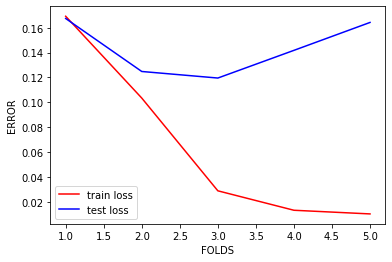

In [ ]:
plt.plot(cross_val,train_loss,color='r',label='train loss')
plt.plot(cross_val,test_loss,color='b',label='test loss')
plt.xlabel('FOLDS')
plt.ylabel('ERROR')
plt.legend()
plt.show()